In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openai
import os

In [2]:
crops = pd.read_csv('Crop_yield.csv')

In [3]:
crops.head(10)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
5,South,Silt,Soybean,797.471182,37.704974,False,True,Rainy,74,5.898416
6,West,Clay,Wheat,357.902357,31.593431,False,False,Rainy,90,2.652392
7,South,Sandy,Rice,441.131154,30.887107,True,True,Sunny,61,5.829542
8,North,Silt,Wheat,181.587861,26.752729,True,False,Sunny,127,2.943716
9,West,Sandy,Wheat,395.048968,17.646199,False,True,Rainy,140,3.707293


In [4]:
crops.isna().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [5]:
crops.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [6]:
crops.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [7]:
# uniqe values and their count
crops['Crop'].value_counts()

Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: Crop, dtype: int64

In [8]:
crops['Crop'].unique()

array(['Cotton', 'Rice', 'Barley', 'Soybean', 'Wheat', 'Maize'],
      dtype=object)

In [9]:
crops['Weather_Condition'].unique()

array(['Cloudy', 'Rainy', 'Sunny'], dtype=object)

In [10]:
crops.groupby('Crop').count()

,Region,Soil_Type,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
Crop,,,,,,,,,
Barley,166777,166777,166777,166777,166777,166777,166777,166777,166777
Cotton,166585,166585,166585,166585,166585,166585,166585,166585,166585
Maize,166824,166824,166824,166824,166824,166824,166824,166824,166824
Rice,166792,166792,166792,166792,166792,166792,166792,166792,166792
Soybean,166349,166349,166349,166349,166349,166349,166349,166349,166349
Wheat,166673,166673,166673,166673,166673,166673,166673,166673,166673


In [11]:
# average yield per crop
yield_per_crop = crops[['Crop','Yield_tons_per_hectare']]
yield_per_crop.groupby(['Crop']).mean().sort_values(['Yield_tons_per_hectare'])

,Yield_tons_per_hectare
Crop,
Maize,4.641387
Barley,4.647412
Rice,4.650760
Cotton,4.650841
Wheat,4.652740
Soybean,4.653712


In [12]:
crops.groupby('Crop')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)

Crop
Soybean    4.653712
Wheat      4.652740
Cotton     4.650841
Rice       4.650760
Barley     4.647412
Maize      4.641387
Name: Yield_tons_per_hectare, dtype: float64

In [13]:
def yield_report(region, yield_val):
    if yield_val >= 4:
        return f"{region} has an excellent yield of {yield_val:.2f}"
    elif yield_val >=3.5:
        return f"{region} region has a solid yield of {yield_val:.2f}"
    elif yield_val <2.0:
        return f"{region} region has a low yield of {yield_val:.2f}"

In [14]:
avg_yield_df = crops.groupby(['Region']).mean().sort_values(['Yield_tons_per_hectare'], ascending=False)
avg_yield_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20320\723412917.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_yield_df = crops.groupby(['Region']).mean().sort_values(['Yield_tons_per_hectare'], ascending=False)


,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare
Region,,,,,,
North,550.793416,27.496045,0.499390,0.499690,104.502588,4.654114
West,549.875231,27.517882,0.500220,0.500028,104.447855,4.649331
South,550.013776,27.502708,0.500432,0.498828,104.494169,4.648843
East,549.243755,27.503226,0.499718,0.499417,104.535545,4.645594


In [15]:
for region,yields in avg_yield_df.iterrows():
    yield_val = yields['Yield_tons_per_hectare']
    print(yield_report(region,yield_val))

North has an excellent yield of 4.65
West has an excellent yield of 4.65
South has an excellent yield of 4.65
East has an excellent yield of 4.65


In [16]:
crops.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [17]:
crops.loc[2:5]

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
5,South,Silt,Soybean,797.471182,37.704974,False,True,Rainy,74,5.898416


In [18]:
highest_roi_crops = crops.loc[(crops['Days_to_Harvest'] < 70)& (crops['Fertilizer_Used']==False) & (crops['Yield_tons_per_hectare'] > 4)]
highest_roi_crops.groupby(['Crop','Weather_Condition']).mean()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20320\1177428003.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  highest_roi_crops.groupby(['Crop','Weather_Condition']).mean()


Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
Crop    Weather_Condition                                                      
Barley  Cloudy              749.974008            27.971687              0.0   
        Rainy               749.490577            28.044020              0.0   
        Sunny               750.314102            28.239771              0.0   
Cotton  Cloudy              740.461552            28.214520              0.0   
        Rainy               754.418985            28.207321              0.0   
        Sunny               757.635001            28.015525              0.0   
Maize   Cloudy              755.751134            27.971668              0.0   
        Rainy               753.696627            28.004782              0.0   
        Sunny               761.189806            27.580666              0.0   
Rice    Cloudy              761.869794            27.868809              0.0   
        Rainy               759.270122            27.847269              0.0   
        Sunny               756.100119            27.830955              0.0   
Soybean Cloudy              752.408792            27.974921              0.0   
        Rainy               764.424992            27.945978              0.0   
        Sunny               756.392097            28.028465              0.0   
Wheat   Cloudy              759.284316            27.880479              0.0   
        Rainy               752.116049            27.830724              0.0   
        Sunny               757.074015            27.765390              0.0   

                           Irrigation_Used  Days_to_Harvest  \
Crop    Weather_Condition                                     
Barley  Cloudy                    0.665971        64.548365   
        Rainy                     0.636678        64.413149   
        Sunny                     0.649601        64.533245   
Cotton  Cloudy                    0.650218        64.457184   
        Rainy                     0.646350        64.550569   
        Sunny                     0.645778        64.530343   
Maize   Cloudy                    0.628709        64.579020   
        Rainy                     0.627907        64.547196   
        Sunny                     0.634244        64.487675   
Rice    Cloudy                    0.623178        64.474670   
        Rainy                     0.625979        64.497389   
        Sunny                     0.609073        64.649767   
Soybean Cloudy                    0.604008        64.472702   
        Rainy                     0.610892        64.356955   
        Sunny                     0.646091        64.521948   
Wheat   Cloudy                    0.638282        64.560408   
        Rainy                     0.671672        64.427986   
        Sunny                     0.648704        64.374488   

                           Yield_tons_per_hectare  
Crop    Weather_Condition                          
Barley  Cloudy                           5.224708  
        Rainy                            5.196576  
        Sunny                            5.215828  
Cotton  Cloudy                           5.174601  
        Rainy                            5.241059  
        Sunny                            5.231712  
Maize   Cloudy                           5.213330  
        Rainy                            5.201156  
        Sunny                            5.216485  
Rice    Cloudy                           5.209713  
        Rainy                            5.211399  
        Sunny                            5.194222  
Soybean Cloudy                           5.160132  
        Rainy                            5.222903  
        Sunny                            5.218829  
Wheat   Cloudy                           5.231982  
        Rainy                            5.234874  
        Sunny                            5.254460

In [19]:
crops.sort_values(['Crop','Yield_tons_per_hectare'], ascending=[0,1]) #alphebatically reverse , with lowest yield 

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
773387,North,Clay,Wheat,174.906657,16.581441,False,False,Sunny,128,-1.147613
77504,West,Sandy,Wheat,120.422223,22.809881,False,False,Rainy,120,-0.841617
387230,East,Clay,Wheat,120.566565,20.118107,False,False,Cloudy,144,-0.802800
770740,West,Loam,Wheat,133.182364,24.926232,False,False,Rainy,72,-0.731541
243824,West,Sandy,Wheat,120.726200,38.340073,False,False,Sunny,97,-0.665293
...,...,...,...,...,...,...,...,...,...,...
224117,West,Silt,Barley,954.911259,34.653132,True,True,Rainy,146,9.580166
350006,West,Loam,Barley,910.598704,38.842505,True,True,Cloudy,135,9.580710
461357,West,Clay,Barley,996.078325,36.972621,True,True,Rainy,135,9.595395
572954,East,Loam,Barley,933.096993,39.445050,True,True,Cloudy,90,9.744646


In [20]:
crops.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

### Q1: "Analyze how rainfall levels affect crop yield. Group the data into rainfall buckets (e.g., Low, Medium, High), and compare the average yield across these groups. Which crops benefit most from high rainfall?"

In [21]:
bins = [0,590,900, float('inf')]
label = ["Low", "Medium", "High"]
crops["Rainfall_Catagory"] = pd.cut(crops["Rainfall_mm"], bins=bins, labels=label, right=False)

In [22]:
crops.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Rainfall_Catagory
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,Medium
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,High
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,Low
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,High
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,Medium


In [23]:
avg_yield = crops.groupby('Rainfall_Catagory')['Yield_tons_per_hectare'].mean()
avg_yield

Rainfall_Catagory
Low       3.624272
Medium    5.625016
High      6.645493
Name: Yield_tons_per_hectare, dtype: float64

In [24]:
high_rain = crops[crops['Rainfall_Catagory'] == "High"]
high_rain.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Rainfall_Catagory
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,High
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,High
13,East,Clay,Barley,929.123735,29.677303,False,True,Rainy,134,6.493031,High
18,North,Sandy,Barley,977.259083,17.604100,False,True,Sunny,93,5.778099,High
20,East,Clay,Cotton,990.267439,24.072052,False,True,Sunny,110,6.187396,High


In [25]:
high_rain.groupby('Crop')['Yield_tons_per_hectare'].agg([min,np.average,max]).sort_values('average', ascending=False)

,min,average,max
Crop,,,
Cotton,3.350350,6.656144,9.786272
Rice,3.527680,6.651294,9.963372
Wheat,3.224601,6.645306,9.802534
Barley,3.218248,6.642600,9.744646
Maize,3.515062,6.641417,9.952983
Soybean,3.350610,6.636089,9.677596


### Q2: "Which weather condition correlates with the highest average yield across all crops? For that condition, list the top 3 crops with the highest performance."

In [26]:
avg_weather_yield = crops.groupby('Weather_Condition')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)
avg_weather_yield

Weather_Condition
Sunny     4.651919
Rainy     4.649277
Cloudy    4.647214
Name: Yield_tons_per_hectare, dtype: float64

In [27]:
sunny = crops[crops['Weather_Condition']=="Sunny"]
sunny.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Rainfall_Catagory
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,Low
7,South,Sandy,Rice,441.131154,30.887107,True,True,Sunny,61,5.829542,Low
8,North,Silt,Wheat,181.587861,26.752729,True,False,Sunny,127,2.943716,Low
10,North,Peaty,Wheat,385.135314,21.656192,False,False,Sunny,73,2.564442,Low
12,South,Peaty,Cotton,607.150252,15.562163,True,True,Sunny,136,6.525186,Medium


In [28]:
sunny.groupby('Crop')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)

Crop
Barley     4.659419
Soybean    4.656385
Cotton     4.652442
Wheat      4.650975
Rice       4.648313
Maize      4.644067
Name: Yield_tons_per_hectare, dtype: float64

### Q3: "Determine the impact of fertilizer and irrigation usage on yield. Does using both together lead to a significant increase in yield compared to using just one or none? Support your answer with data."

In [29]:
# preparing subset of the data to compare against average yield
fertilizer_only = crops[(crops["Fertilizer_Used"] == True) & (crops["Irrigation_Used"] == False)]["Yield_tons_per_hectare"].mean()
irrigation_only = crops[(crops["Fertilizer_Used"] == False) & (crops["Irrigation_Used"] == True)]["Yield_tons_per_hectare"].mean()
fertilizer_and_irrigation = crops[(crops["Fertilizer_Used"] == True) & (crops["Irrigation_Used"] == True)]["Yield_tons_per_hectare"].mean()
neither = crops[(crops["Fertilizer_Used"] == False) & (crops["Irrigation_Used"] == False)]["Yield_tons_per_hectare"].mean()

In [30]:
print(f'Avg yield using fertilizer only: {fertilizer_only:.2f}')
print(f'Avg yield using irrigation only: {irrigation_only:.2f}')
print(f'Avg yield using both: {fertilizer_and_irrigation:.2f}')
print(f'Avg yield using neither: {neither:.2f}')

Avg yield using fertilizer only: 4.80
Avg yield using irrigation only: 4.50
Avg yield using both: 6.00
Avg yield using neither: 3.30


### Q4: "Which soil type produces the highest average yield overall? Does this advantage hold across all major crops (i.e., those with >50 samples)? Provide a table or visual to support your findings."

In [31]:
crops['Soil_Type'].unique()

array(['Sandy', 'Clay', 'Loam', 'Silt', 'Peaty', 'Chalky'], dtype=object)

In [32]:
crops.groupby('Soil_Type')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)

Soil_Type
Chalky    4.652895
Peaty     4.651063
Loam      4.651056
Sandy     4.648511
Silt      4.648414
Clay      4.644891
Name: Yield_tons_per_hectare, dtype: float64

In [33]:
crops.groupby(['Soil_Type','Crop'])['Yield_tons_per_hectare'].mean().unstack()

Crop,Barley,Cotton,Maize,Rice,Soybean,Wheat
Soil_Type,,,,,,
Chalky,4.649948,4.663595,4.653498,4.640907,4.657995,4.651330
Clay,4.651793,4.645118,4.630174,4.646297,4.651116,4.644797
Loam,4.643126,4.633848,4.666891,4.651742,4.639517,4.671253
Peaty,4.650058,4.647561,4.635270,4.657866,4.661625,4.654183
Sandy,4.658929,4.652088,4.632811,4.654259,4.656205,4.636889
Silt,4.630665,4.662891,4.629473,4.653537,4.655866,4.658146


### Q5: "Is there a correlation between the number of days to harvest and yield? Plot a trend line or compute the correlation coefficient. Which crops deviate the most from this trend?"

In [34]:
crops.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20320\2959493338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crops.corr()


,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare
Rainfall_mm,1.000000,-0.000123,-0.001076,-0.000568,-0.002669,0.764618
Temperature_Celsius,-0.000123,1.000000,0.002343,-0.000484,-0.000731,0.085565
Fertilizer_Used,-0.001076,0.002343,1.000000,0.001510,-0.001029,0.442099
Irrigation_Used,-0.000568,-0.000484,0.001510,1.000000,-0.001234,0.353741
Days_to_Harvest,-0.002669,-0.000731,-0.001029,-0.001234,1.000000,-0.002591
Yield_tons_per_hectare,0.764618,0.085565,0.442099,0.353741,-0.002591,1.000000


In [35]:
crops.groupby('Crop').corr().unstack()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20320\735821635.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crops.groupby('Crop').corr().unstack()


Rainfall_mm                                                      \
        Rainfall_mm Temperature_Celsius Fertilizer_Used Irrigation_Used   
Crop                                                                      
Barley          1.0            0.001911        0.003712       -0.001766   
Cotton          1.0           -0.000123       -0.001246       -0.001274   
Maize           1.0            0.001026       -0.002814        0.000677   
Rice            1.0           -0.000175        0.000036        0.000401   
Soybean         1.0           -0.000915       -0.004928        0.001988   
Wheat           1.0           -0.002478       -0.001240       -0.003419   

                                               Temperature_Celsius  \
        Days_to_Harvest Yield_tons_per_hectare         Rainfall_mm   
Crop                                                                 
Barley        -0.000460               0.765172            0.001911   
Cotton         0.000532               0.764675           -0.000123   
Maize         -0.002027               0.764724            0.001026   
Rice          -0.004000               0.765104           -0.000175   
Soybean       -0.005869               0.763465           -0.000915   
Wheat         -0.004204               0.764565           -0.002478   

                                                             ...  \
        Temperature_Celsius Fertilizer_Used Irrigation_Used  ...   
Crop                                                         ...   
Barley                  1.0        0.006024        0.000002  ...   
Cotton                  1.0       -0.000599        0.001038  ...   
Maize                   1.0        0.000313        0.000920  ...   
Rice                    1.0       -0.000043       -0.001105  ...   
Soybean                 1.0        0.007623       -0.000504  ...   
Wheat                   1.0        0.000719       -0.003268  ...   

        Days_to_Harvest                                  \
        Fertilizer_Used Irrigation_Used Days_to_Harvest   
Crop                                                      
Barley         0.000787       -0.004672             1.0   
Cotton         0.005008       -0.001751             1.0   
Maize         -0.002709       -0.003750             1.0   
Rice          -0.003031        0.001708             1.0   
Soybean       -0.001874       -0.002672             1.0   
Wheat         -0.004356        0.003724             1.0   

                               Yield_tons_per_hectare                      \
        Yield_tons_per_hectare            Rainfall_mm Temperature_Celsius   
Crop                                                                        
Barley               -0.000405               0.765172            0.089295   
Cotton                0.001401               0.764675            0.085841   
Maize                -0.004679               0.764724            0.085788   
Rice                 -0.002996               0.765104            0.082479   
Soybean              -0.005059               0.763465            0.087785   
Wheat                -0.003805               0.764565            0.082171   

                                                                                
        Fertilizer_Used Irrigation_Used Days_to_Harvest Yield_tons_per_hectare  
Crop                                                                            
Barley         0.445808        0.351415       -0.000405                    1.0  
Cotton         0.441043        0.353383        0.001401                    1.0  
Maize          0.440364        0.355614       -0.004679                    1.0  
Rice           0.441873        0.354886       -0.002996                    1.0  
Soybean        0.440676        0.356340       -0.005059                    1.0  
Wheat          0.442816        0.350823       -0.003805                    1.0  

[6 rows x 36 columns]

### Q6: "Design a rule-based scoring system (1 to 5 stars) to rate crop performance per region. Your rating should consider: yield, rainfall, and whether both irrigation and fertilizer are used. Justify the logic you use."

In [36]:
median_yield = crops["Yield_tons_per_hectare"].median()
crops["Yield_Label"] = crops["Yield_tons_per_hectare"].apply(lambda y: "High" if y >= median_yield else "Low")

In [37]:
feature_combinations = crops.groupby(["Fertilizer_Used", "Irrigation_Used", "Weather_Condition"])["Yield_Label"].value_counts(normalize=True).unstack()
feature_combinations

Yield_Label                                            High       Low
Fertilizer_Used Irrigation_Used Weather_Condition                    
False           False           Cloudy             0.200438  0.799562
                                Rainy              0.205121  0.794879
                                Sunny              0.202082  0.797918
                True            Cloudy             0.465043  0.534957
                                Rainy              0.465763  0.534237
                                Sunny              0.467903  0.532097
True            False           Cloudy             0.534817  0.465183
                                Rainy              0.531939  0.468061
                                Sunny              0.535350  0.464650
                True            Cloudy             0.797984  0.202016
                                Rainy              0.798348  0.201652
                                Sunny              0.797020  0.202980

In [38]:
high_yield_rules = feature_combinations[feature_combinations["High"] > 0.7]
print(high_yield_rules.sort_values("High", ascending=False))

Yield_Label                                            High       Low
Fertilizer_Used Irrigation_Used Weather_Condition                    
True            True            Rainy              0.798348  0.201652
                                Cloudy             0.797984  0.202016
                                Sunny              0.797020  0.202980


## ML

In [39]:
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score, confusion_matrix,classification_report
from sklearn.pipeline import Pipeline

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20320\2846672.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crops.corr(),annot=True,cmap='coolwarm', fmt='.2f')


<Axes: >

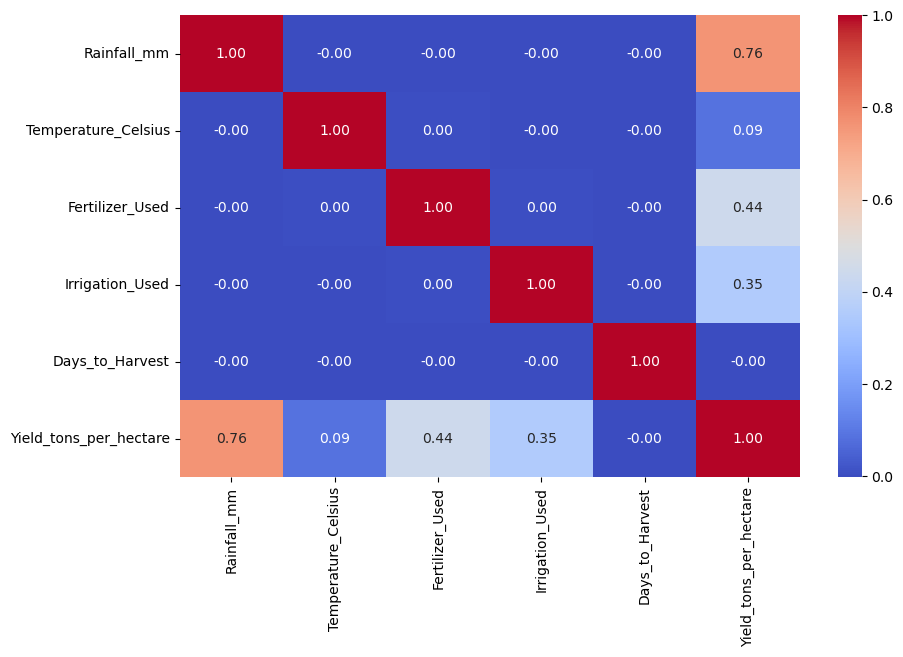

In [40]:
plt.figure(figsize = (10,6))
sns.heatmap(crops.corr(),annot=True,cmap='coolwarm', fmt='.2f')

### Linear Regression

In [41]:
features = ['Rainfall_mm', 'Fertilizer_Used', 'Irrigation_Used']
target_linear = 'Yield_tons_per_hectare'
X = crops[features]
y_linear = crops[target_linear]

In [42]:
numerical_features = ['Rainfall_mm'] 
categorical_features = ['Fertilizer_Used', 'Irrigation_Used']

In [43]:
# We'll use StandardScaler for numerical features and OneHotEncoder for categorical features.
# ColumnTransformer allows us to apply different transformations to different columns.
# Preprocessing for numerical data: Scaling is generally good practice for regression models
# It helps prevent features with larger scales from dominating the learning process.
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int)

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [45]:
X_train_lin,X_test_lin, y_train_lin , y_test_lin = train_test_split(X, y_linear,test_size=0.2, random_state = 42)

In [46]:
# Pipelines streamline the workflow: preprocessing -> model training
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [47]:
linear_regression_pipeline.fit(X_train_lin, y_train_lin)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rainfall_mm']),
                                                 ('cat',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Fertilizer_Used',
                                                   'Irrigation_Used'])])),
                ('regressor', LinearRegression())])

In [48]:
y_pred_lin = linear_regression_pipeline.predict(X_test_lin)

In [49]:
print(f"MSE: {mean_squared_error(y_test_lin, y_pred_lin):.4f}")
print(f"R2: {r2_score(y_test_lin, y_pred_lin):.4f}")

MSE: 0.2714
R2: 0.9059


### Logistic Regression

In [50]:
features = ['Rainfall_mm', 'Fertilizer_Used', 'Irrigation_Used']
target_log = 'Yield_Label'
X = crops[features]
y_log = crops[target_log]

In [51]:
numerical_features = ['Rainfall_mm'] 
categorical_features = ['Fertilizer_Used', 'Irrigation_Used']

In [52]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int)

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [54]:
X_train_log, X_test_log, y_train_log,y_test_log = train_test_split(X, y_log, test_size = 20, random_state=42)

In [55]:
logistic_regression_pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('regressor', LogisticRegression())
])

In [56]:
logistic_regression_pipeline.fit(X_train_log, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rainfall_mm']),
                                                 ('cat',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Fertilizer_Used',
                                                   'Irrigation_Used'])])),
                ('regressor', LogisticRegression())])

In [57]:
y_pred_log = logistic_regression_pipeline.predict(X_test_log)

In [58]:
print(f"Accuracy: {accuracy_score(y_test_log, y_pred_log):.4f}")
print("Classification Report:\n", classification_report(y_test_log, y_pred_log))

Accuracy: 0.9500
Classification Report:
               precision    recall  f1-score   support

        High       0.92      1.00      0.96        12
         Low       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



### Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
crops.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Rainfall_Catagory,Yield_Label
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,Medium,High
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,High,High
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,Low,Low
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,High,High
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,Medium,High


In [61]:
features = ['Rainfall_mm', 'Temperature_Celsius','Fertilizer_Used', 'Irrigation_Used','Days_to_Harvest','Soil_Type','Region']
target = 'Crop'
X = crops[features]
y = crops[target]

In [62]:
categorical_features = ['Fertilizer_Used', 'Irrigation_Used','Region','Soil_Type']
numerical_features = ['Rainfall_mm','Days_to_Harvest', 'Temperature_Celsius']

In [63]:
preprocessor = ColumnTransformer(
    transformers = [
        ('cat',categorical_transformer,categorical_features),
        ('num',numerical_transformer,numerical_features)
    ]
)

In [64]:
X_train_d,X_test_d,y_train_d,y_test_d = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [65]:
decsion_tree_classifier_pipeline = Pipeline(
steps = [
    ('preprocessor',preprocessor),
    ('classifier',DecisionTreeClassifier(random_state=42))
]
)

In [66]:
decsion_tree_classifier_pipeline.fit(X_train_d,y_train_d)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Fertilizer_Used',
                                                   'Irrigation_Used', 'Region',
                                                   'Soil_Type']),
                                                 ('num', StandardScaler(),
                                                  ['Rainfall_mm',
                                                   'Days_to_Harvest',
                                                   'Temperature_Celsius'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [67]:
y_pred_d = decsion_tree_classifier_pipeline.predict(X_test_d)

In [68]:
accuracy = accuracy_score(y_test_d, y_pred_d)
conf_matrix = confusion_matrix(y_test_d, y_pred_d)
class_report = classification_report(y_test_d, y_pred_d)

print(f"\nDecision Tree Accuracy for Crop Type: {accuracy:.4f}")
print("\nDecision Tree Confusion Matrix:")
print(conf_matrix)
print("\nDecision Tree Classification Report:")
print(class_report)


Decision Tree Accuracy for Crop Type: 0.1670

Decision Tree Confusion Matrix:
[[5620 5593 5456 5575 5548 5563]
 [5529 5522 5559 5718 5445 5544]
 [5477 5565 5646 5701 5452 5524]
 [5577 5587 5500 5590 5471 5633]
 [5550 5530 5508 5552 5502 5628]
 [5518 5509 5560 5648 5582 5518]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

      Barley       0.17      0.17      0.17     33355
      Cotton       0.17      0.17      0.17     33317
       Maize       0.17      0.17      0.17     33365
        Rice       0.17      0.17      0.17     33358
     Soybean       0.17      0.17      0.17     33270
       Wheat       0.17      0.17      0.17     33335

    accuracy                           0.17    200000
   macro avg       0.17      0.17      0.17    200000
weighted avg       0.17      0.17      0.17    200000



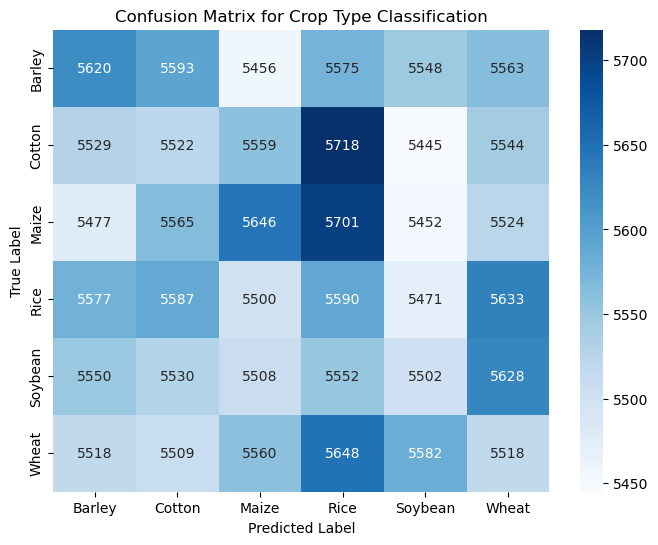

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=decsion_tree_classifier_pipeline.named_steps['classifier'].classes_,
            yticklabels=decsion_tree_classifier_pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix for Crop Type Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()